<a href="https://colab.research.google.com/github/sai-darshan-k/LLM/blob/main/Sai_Darshan_548_Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Loading the fine-tuned model and tokenizer.

In [ ]:
from transformers import TFBertModel, BertTokenizer
from tensorflow.keras.applications import ResNet50
text_tokenizer=BertTokenizer.from_pretrained('bert-base-uncased')
text_model=TFBertModel.from_pretrained('bert-base-uncased')
image_model=ResNet50(weights='imagenet', include_top=False, pooling='avg')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

### Preprocessing Text

In [ ]:
import tensorflow as tf
text="My name is Sai Darshan and I am studying in CHRIST (Deemed to be University)"
inputs = text_tokenizer(text, return_tensors='tf', truncation=True, padding=True)
outputs = text_model(inputs)
text_embedding = outputs.last_hidden_state[:, 0, :]

### Preprocessing Image

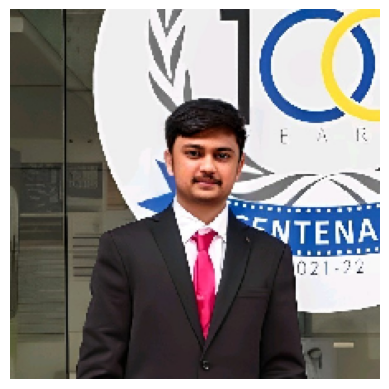

Image embedding shape: (1, 2048)


In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

img = image.load_img('/content/My Pic.jpg', target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

plt.imshow(img)
plt.axis('off')
plt.show()

img_embedding = image_model(img_array)

print("Image embedding shape:", img_embedding.shape)

### Combine Text and Image Embedding

In [ ]:
combined_embedding=tf.concat([text_embedding, img_embedding], axis=1)
print("Text Embedding Shape:",text_embedding.shape)
print("Image Embedding Shape:",img_embedding.shape)
print("Combined Embedding Shape:",combined_embedding.shape)

Text Embedding Shape: (1, 768)
Image Embedding Shape: (1, 2048)
Combined Embedding Shape: (1, 2816)
